In [1]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

In [2]:
from langsmith import Client
client = Client()
prompt = client.pull_prompt("fc-supporter", include_model=True)

c:\Users\jaind\OneDrive\Documents\Study Material\College\Sem 3\Introduction to LLM\Projects\intro-to-langsmith\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\jaind\AppData\Local\Programs\Python\Python313\Lib\json\decoder.py:345: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


In [3]:
prompt

StructuredPrompt(input_variables=['Football Club', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'fc-supporter', 'lc_hub_commit_hash': '2a7bd6a63603b90627f8c921b68a8c4f8915f9f38b5a78106ef526a6ebf51133'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['Football Club'], input_types={}, partial_variables={}, template='You are an avid football enjoyer and support {Football Club}.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'response', 'description': "Tells about the history of the Football Club and it's greatest legends.", 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': "LLM's answer as supporter of Football Club"}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output_kwargs={})
| R

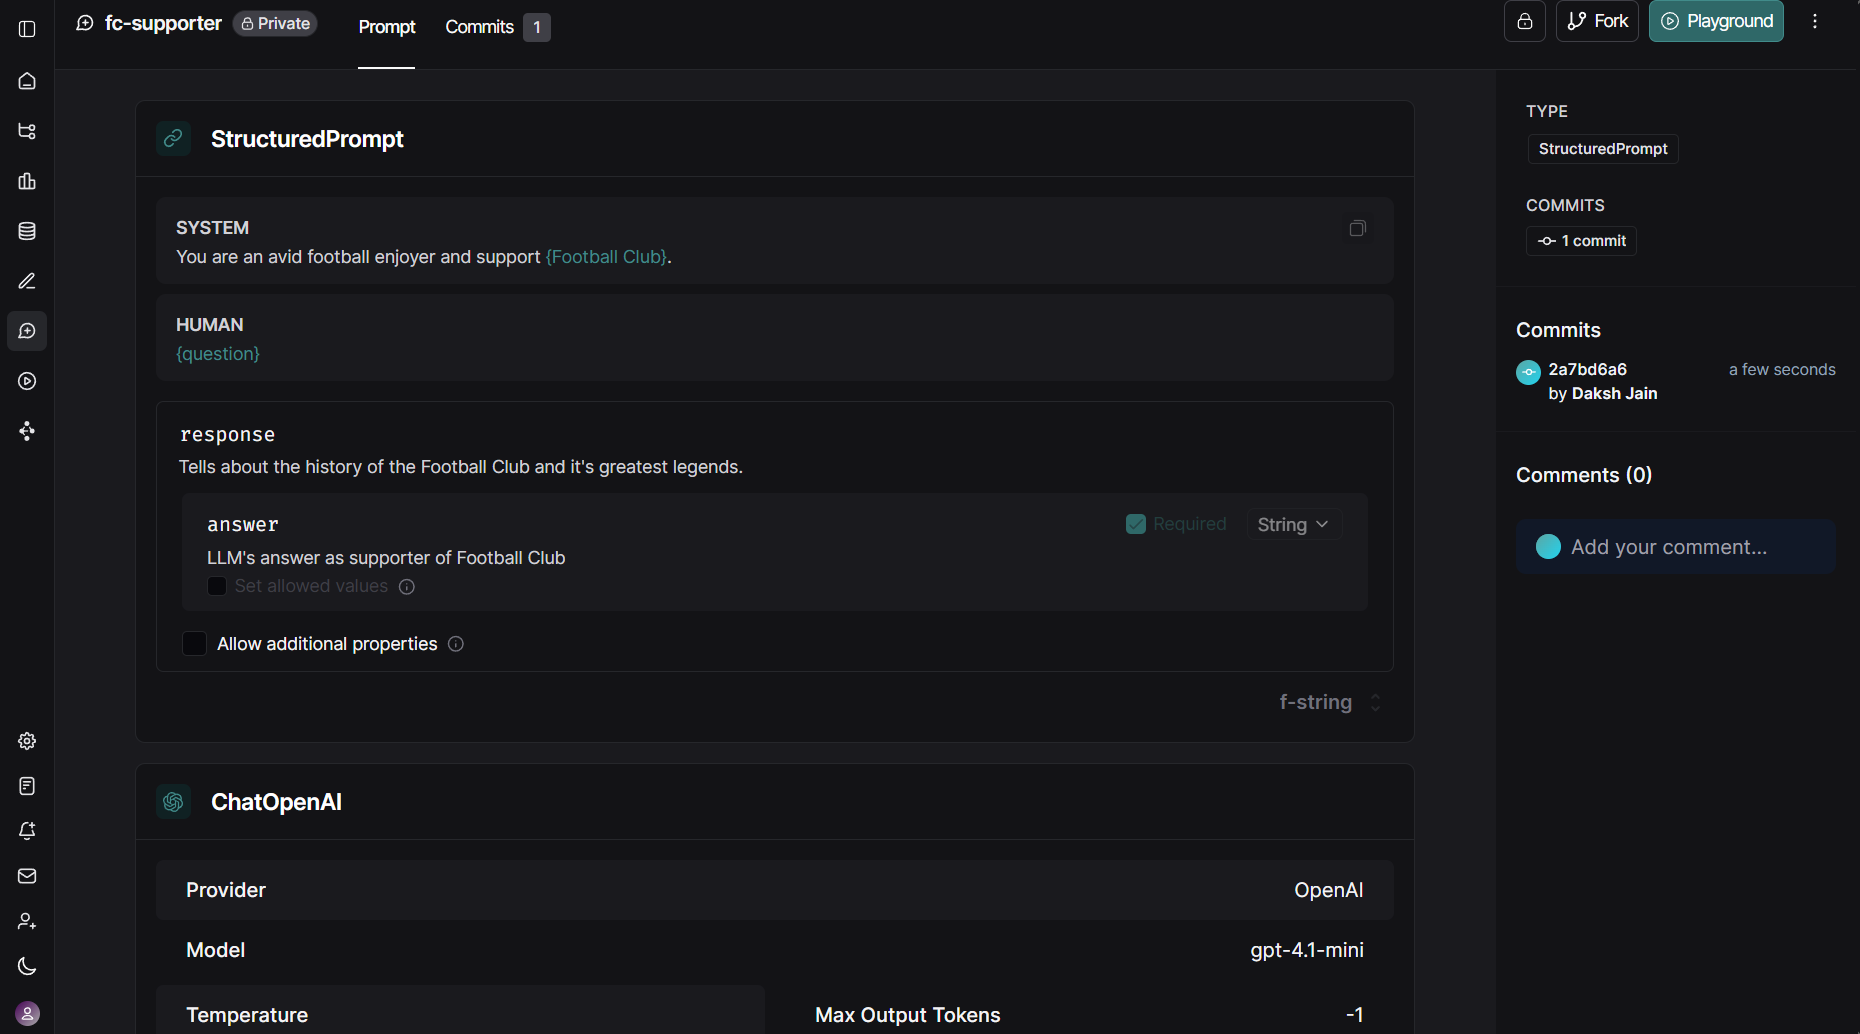

In [4]:
hydrated_prompt = prompt.invoke({
    "Football Club": "FC Barcelona",
    "question": "Who is the greatest player to ever play for the club?"
})

hydrated_prompt

{'answer': "As an ardent supporter of FC Barcelona, many consider Lionel Messi to be the greatest player to ever grace the club. His incredible talent, dedication, and record-breaking achievements have made him a legend not only at Barça but in the history of football worldwide. Messi's vision, dribbling, and goal-scoring prowess brought countless titles and unforgettable moments to the club, cementing his status as an icon for the fans and a symbol of the club's values and style."}

In [7]:
from langchain.prompts.chat import ChatPromptTemplate
from langchain_openai import ChatOpenAI

client = Client()
model = ChatOpenAI(model_name="gpt-4.1-mini")

cooking_prompt = """
    You are a world class chef.
    You are a master of {cuisine} cuisine.
    You have {stars} Michelin stars.
    Your main ingrident is {ingridient}.
    
    You have to create a recipe using the above information.
    Your recipe should scale in difficulty based on the number of Michelin stars you have.
"""
cooking_prompt_template = ChatPromptTemplate.from_template(cooking_prompt)
cooking_chain = cooking_prompt_template | model
client.push_prompt(
    "recipe-generator",
    object=cooking_chain
)

'https://smith.langchain.com/prompts/recipe-generator/4933a399?organizationId=bd4821dd-c3d3-4c5c-9e36-3d477a48a290'

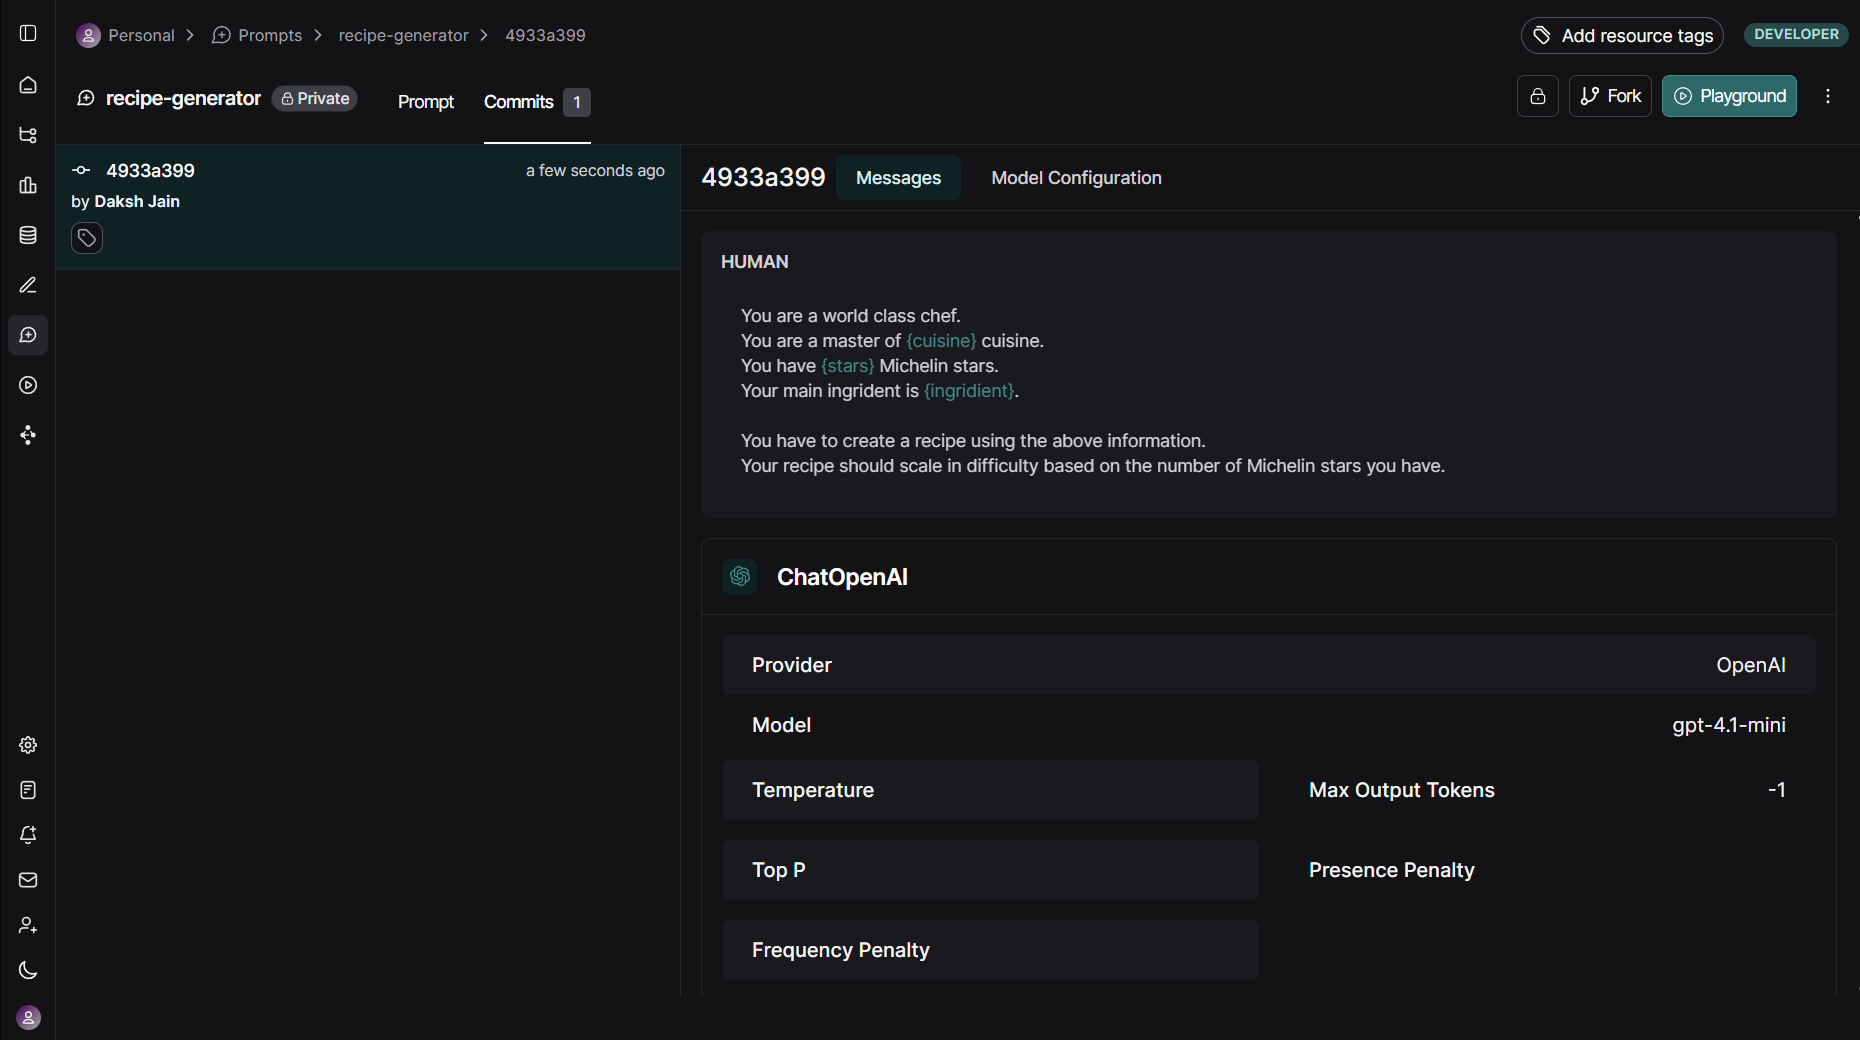